# Phishing Classification

This analysis is based on data retrieved from XXX


Importing Packages.

In [1]:
# Import various key libraries for doing classification
import pandas as pd
import numpy as np

# data preprocessing
from sklearn.preprocessing import StandardScaler

# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns

# model fit
from sklearn.model_selection import train_test_split

import tensorflow as tf
# ignore warnings (libraries are rapidly changing)
import warnings
warnings.filterwarnings('ignore')

## Import data
Import the data the inspect the contents.

In [2]:
# Lets read the data start exploring to understand it.
# read data
data = pd.read_csv('dataset_full.csv', sep=',')

# print shape of df, number of countries, and time period covered
print('Shape of data: ', data.shape)
display(data.head())

Shape of data:  (88647, 112)


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [3]:
print('Columns: ', list(data.columns))

Columns:  ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory',

In [4]:
display(data.dtypes)

qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object

## Data Characteristics

The data is labelled phishing data with URLs suspected of being phishing URLs labelled as 1 and regular URLs labelled a 0.  The data contains 111 features describing various characteristics of the URLs including the number of occurrences of various characteristics in the URLs.

Specific characters being tracked for occurrence in the URL and parts of URLs include dot '.', hyphen '-', underline '_', slash '/', questionmark '?' etc.

Other characteristics of URLs being tracked include length, occurance of IP address, time response, domain SPF, TTL, time of expiration, occurance of name servers and mx servers in the the route.



## Describe the data

We can describe the data using various summary statistics.

In [5]:
## Inspect and describe the data.
display(data.describe())

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


There are at total of 58645 observations.  Based on an initial review, we observe 4 type of data:

+ Counts (various qty_*)
+ Lengths (various length)
+ Time (seconds) i.e. TTL, Time Response
+ Presence (Y/N) i.e. TLS certificates, Google Index, Domain

it is clear that the count data and length data have skews based on underlying data occurrences and the time data is not on the same scale.  These are need to be normalized and standardized for input our ML algorithms.

## Understanding the Data
### Input variables
1. Qty features indicate the number of specific characters in each part of the URL
+ URL
+ Domain
+ Directory
+ File
+ Params
2. Length features indicate the length of the part or subpart of the URL
+ directory_length
+ params_length
+ domain_length
+ url_length
3. Time features that indicate time elapsed for certain actions
+ time_response
+ time_domain_activation
+ time_domain_expiration
+ ttl hostname
4. Presence features that indicate if some element is present or not.
+ url_google_index
+ domain_google_index
+ email in domain
+ url_shortened
+ tls_ssl_certificate
+ domain_spf
+ email_in_url

### Target variable
1. Phishing - 0 normal url, 1 phishing url

In [6]:
display(data.phishing.value_counts())

phishing
0    58000
1    30647
Name: count, dtype: int64

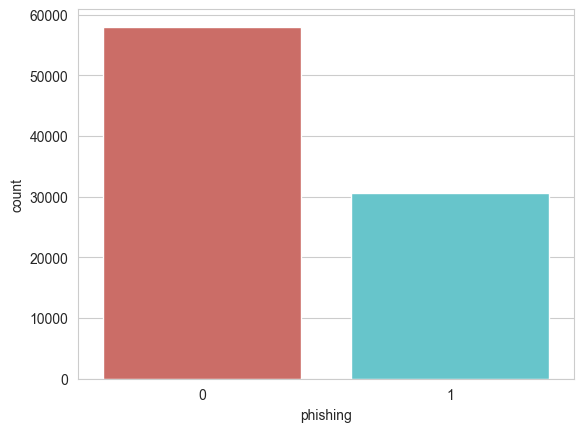

In [7]:
sns.countplot(x='phishing',data=data,palette='hls')
plt.show()

In [8]:
## Data Summarization
display(data.groupby('phishing').mean())

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
phishing,,,,,,,,,,,,,,,,,,,,,
0,2.037638,0.165776,0.022483,0.319379,0.000190,0.023707,0.000034,0.011828,0.000862,0.000000,...,424.196483,1.155655,2.836207,1.841155,6249.387000,0.519621,0.379103,0.001793,0.001983,0.000155
1,2.482233,0.637354,0.286847,3.103142,0.026626,0.550592,0.063954,0.385127,0.006885,0.002937,...,215.491957,1.100434,2.651679,1.555585,5990.479199,0.481515,0.277287,0.000685,0.002088,0.015564


**Observation**

1. asterisk, hashtag, dollar are all not in normal URLs and only in Phishing URLs
2. phishing URLs tend to be much longer
3. slash, question, equal, and, exclamation, space, tilde, comma, plus, asterisk, hash, dollar, percent are not valid character for domain in either category.  These features can be dropped
4. Need to understand what `-` means in directory
5. directory_length is much longer for phishing sites
6. file_length is much longer for phishing sites
7. params_length much longer for phishing sites
8. time_domain_activation is much shorter for phishing sites
9. time_domain_expiration is much shorter for phishing sites


In [9]:
### Lets get our Data and Target Variable Separated
data_x = data.drop('phishing', axis=1)
y = data['phishing']

print("X Shape:", data_x.shape)
print("y Shape:", y.shape)

X Shape: (88647, 111)
y Shape: (88647,)


### Standardize the Data
We will standardize the training data and the test data each by themselves so that we don't introduce any inadvertent information / biases in the model training.  We'll do this even for the RFE process because using RFE on non-standardized data may not yield the best results for the RFE algorithm.

1. let's separate test and training before we do the training and feature identification
2. standardize the data using StandardScalar
3. Use standardized X_train to run RFE

In [10]:
### Let's create the Training Set before we do any standardization or normalization.
### Let's do a 70/30 split on test v. train
X_train,X_test,y_train,y_test = train_test_split(data_x,y,
                                                 test_size = 0.3,
                                                 shuffle=True,
                                                 random_state=24)

### Standardize the training set for RFE
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train Shape:", X_train.shape)
print("y_train  Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (62052, 111)
y_train  Shape: (62052,)
X_test Shape: (26595, 111)
y_test Shape: (26595,)


### Recursive Feature Elimination
First, let's do feature selection based on RFE (Recursive Feature Elimination)
Next, examine the features that have been selected by sorting by rank


In [11]:
### using logistic regression.  RFE = 30 features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(estimator=logreg,n_features_to_select=30)
X_train = rfe.fit_transform(X_train,y_train)
print(X_train)
X_test = rfe.transform(X_test)
Selected_Features_Support = list(rfe.support_)
Selected_Features_rank = list(rfe.ranking_)

[[ 1.46074005  3.22731069 -0.01361861 ...  7.23568353 -0.52337557
  -0.07433544]
 [ 1.46074005 -0.07427667 -0.01361861 ... -0.13820394  1.51669335
  -0.07433544]
 [-0.15389975 -0.07427667 -0.01361861 ... -0.13820394 -0.39422817
  -0.07433544]
 ...
 [ 0.65342015 -0.07427667 -0.01361861 ... -0.13820394 -1.11456178
  -0.07433544]
 [-0.96121965 -0.07427667 -0.01361861 ... -0.13820394 -0.28841274
  -0.07433544]
 [-0.96121965 -0.07427667 -0.01361861 ... -0.13820394  1.28501671
  -0.07433544]]


In [12]:
### Let's see what's been selected as features in sorted rank order
Features = data_x.columns.tolist()
Selected_Features = np.column_stack((Features,Selected_Features_Support,Selected_Features_rank))
Selected_Features_df = pd.DataFrame(Selected_Features,columns=['Feature','Selected','Rank'])
Selected_Features_df['Rank'] = Selected_Features_df['Rank'].astype(int)
Selected_Features_df = Selected_Features_df.sort_values('Rank')
display(Selected_Features_df)

,Feature,Selected,Rank
0,qty_dot_url,True,1
43,qty_slash_directory,True,1
45,qty_equal_directory,True,1
46,qty_at_directory,True,1
48,qty_exclamation_directory,True,1
...,...,...,...
27,qty_exclamation_domain,False,78
30,qty_comma_domain,False,79
29,qty_tilde_domain,False,80
33,qty_hashtag_domain,False,81


In [13]:
selected_idx = Selected_Features[:, 1] == 'True'
final_selection = Selected_Features[selected_idx,0]
display(final_selection)

array(['qty_dot_url', 'qty_at_url', 'qty_asterisk_url', 'qty_percent_url',
       'length_url', 'qty_dot_domain', 'qty_dot_directory',
       'qty_hyphen_directory', 'qty_slash_directory',
       'qty_equal_directory', 'qty_at_directory',
       'qty_exclamation_directory', 'qty_asterisk_directory',
       'qty_underline_file', 'qty_exclamation_file', 'qty_tilde_file',
       'qty_comma_file', 'qty_asterisk_file', 'qty_questionmark_params',
       'qty_equal_params', 'qty_at_params', 'qty_and_params',
       'qty_space_params', 'qty_hashtag_params', 'params_length',
       'tld_present_params', 'qty_params', 'email_in_url',
       'time_domain_activation', 'url_shortened'], dtype='<U26')

### Model Implementation

Let's run various ML models including:

1. Logistic Regression
2. Decision Tree
3. KNN

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

## Calculating the accuracy
print('Accuracy of logistic regression classifier on test set: {:2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.925700


In [15]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)

modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train,y_train,
                                          cv = kfold, scoring = scoring)
print("10-fold cross-validation average accuracy : %.3f" % (results.mean()))

10-fold cross-validation average accuracy : 0.926


<function confusion_matrix at 0x000001C5098B6C20>


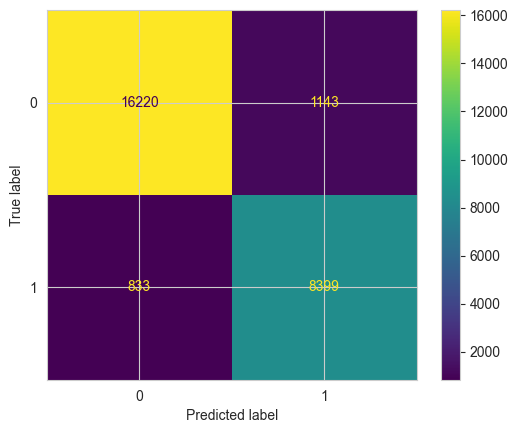

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     17363
           1       0.88      0.91      0.89      9232

    accuracy                           0.93     26595
   macro avg       0.92      0.92      0.92     26595
weighted avg       0.93      0.93      0.93     26595



With 30 features for Logistic regression determined by RFE (Recursive Feature Elimination) here are the results:

Thus,
+ True Negative = 16220 - Not a Phishing Site (**predicted correctly**)
+ False Negative = 833 - Phishing site (predicted ***incorrectly***)
+ True Positive = 8399 - Phishing Site (**predicted correctly**)
+ False Positive = 1143 - Not a Phishing Site (predicted ***incorrectly***)

Precision = TP/(TP+FP) = 88% for  phishing URLS
i.e. When it predicts a phishing URL, it is correct 88% of the time.

Recall = TP/(TP+FN) = 91% for phishing URLs
i.e. It identifies 91% of the phishing URLs in the dataset.

F score = 2 * (Precision * Recall)/(Precision + Recall) = 89%

Accuracy = 93%
While Accuracy is high, we want more phishing sites to be caught.  So we want higher recall.

### Decision Tree classifier with Max Depth - 5

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(criterion="entropy",
                            min_samples_split=10,
                            max_depth=5)
dt.fit(X_train, y_train)
print('Accuracy:', dt.score(X_test, y_test))

Accuracy: 0.910547095318669


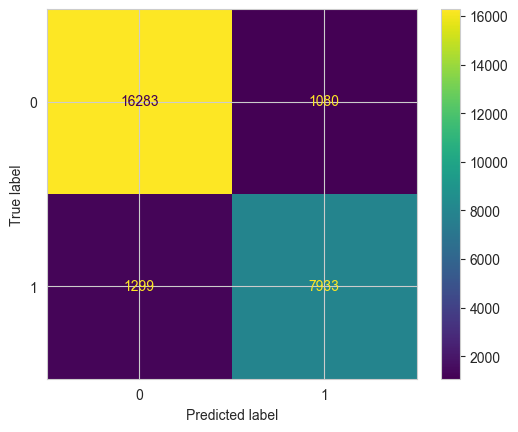

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     17363
           1       0.88      0.86      0.87      9232

    accuracy                           0.91     26595
   macro avg       0.90      0.90      0.90     26595
weighted avg       0.91      0.91      0.91     26595



#### Decision Tree - Depth 5 Analysis

Precision = TP/(TP+FP) = 88% for phishing URLS
i.e. When it predicts a phishing URL, it is correct 88% of the time.

Recall = TP/(TP+FN) = 86% for phishing URLs
i.e. It identifies 86% of the phishing URLs in the dataset.

F score = 2 * (Precision * Recall)/(Precision + Recall) = 87%
Accuracy = 91% While Accuracy is high, we want more phishing sites to be caught. So we want higher recall.

Accuracy of the depth 5 decision tree model is lower that logistic regression
Recall is also lower at only 86%, meaning not as many phishing sites are being caught.

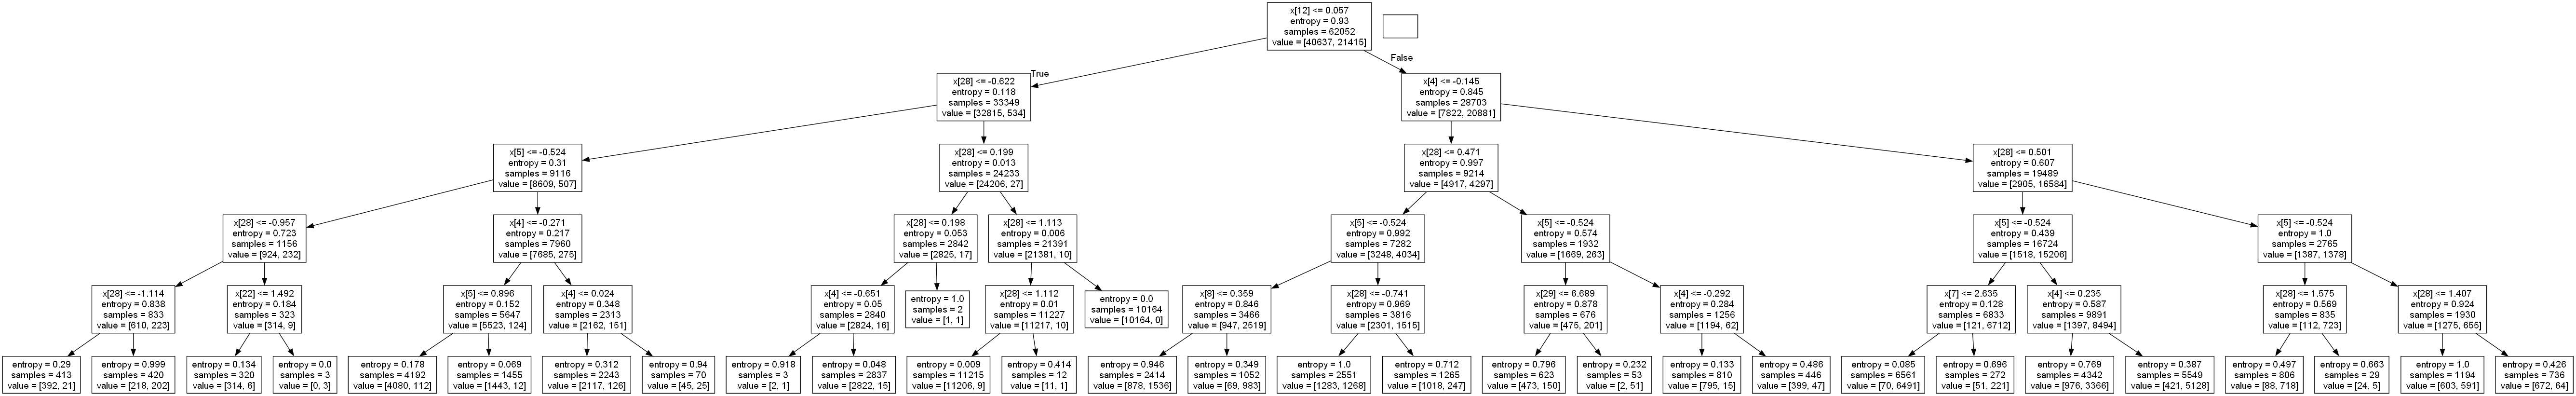

In [24]:
import graphviz
import pydotplus
from IPython.display import Image
import os

# For Windows machines, temporarily adjust PATH if necessary to use graphviz
os.environ['PATH'] = os.environ['PATH'] + r";C:\Program Files\Graphviz\bin"

dot_data = tree.export_graphviz(dt, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

### Decision Tree classifier with Max Depth - 10

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(criterion="entropy",
                            min_samples_split=10,
                            max_depth=10)
dt.fit(X_train, y_train)
print('Accuracy:', dt.score(X_test, y_test))

Accuracy: 0.9356269975559316


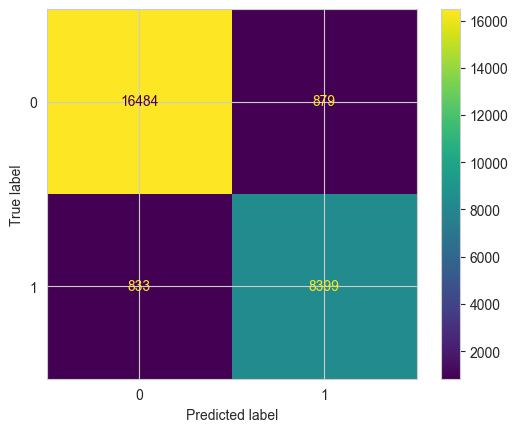

In [34]:
from sklearn.metrics import confusion_matrix

y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17363
           1       0.91      0.91      0.91      9232

    accuracy                           0.94     26595
   macro avg       0.93      0.93      0.93     26595
weighted avg       0.94      0.94      0.94     26595



#### Decision Tree - Depth 10 Analysis

Precision = TP/(TP+FP) = 91% for phishing URLS
i.e. When it predicts a phishing URL, it is correct 91% of the time.

Recall = TP/(TP+FN) = 91% for phishing URLs
i.e. It identifies 91% of the phishing URLs in the dataset.

F score = 2 * (Precision * Recall)/(Precision + Recall) = 91%

Accuracy = 94%
Depth 10 Decision Tree gives us better accuracy than logistic regression.
We want more phishing sites to be caught. So we want high recall as well

Recall is same as logistic regression at 91%.  So the same number of phishing sites are being caught with Decision Tree with Depth 10.  That being said, F1 for 'non-Phishing sites' is higher at 95%.  So non-phishing sites are being more accurately identified and at a higher rate.

### Decision Tree classifier with Max Depth - 15

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(criterion="entropy",
                            min_samples_split=10,
                            max_depth=15)
dt.fit(X_train, y_train)
print('Accuracy:', dt.score(X_test, y_test))

Accuracy: 0.9346869712351946


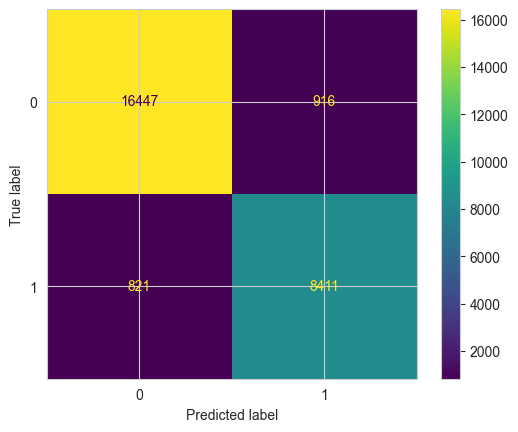

In [38]:
from sklearn.metrics import confusion_matrix

y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17363
           1       0.90      0.91      0.91      9232

    accuracy                           0.93     26595
   macro avg       0.93      0.93      0.93     26595
weighted avg       0.93      0.93      0.93     26595



#### Decision Tree - Depth 15 Analysis

Precision = TP/(TP+FP) = 90% for phishing URLS
i.e. When it predicts a phishing URL, it is correct 90% of the time.

Recall = TP/(TP+FN) = 91% for phishing URLs
i.e. It identifies 91% of the phishing URLs in the dataset.

F score = 2 * (Precision * Recall)/(Precision + Recall) = 91%

Accuracy = 93%
Depth 15 Decision Tree gives us lower accuracy than depth 10 decision tree.

Recall is same as logistic regression at 91%.  So the same number of phishing sites are being caught with Decision Tree with Depth 15.  But more non-phishing sites are also being identified as phishing (precision is lower).

That being said, F1 for 'non-Phishing sites' is higher at 95%.  So non-phishing sites are being more accurately identified and at a higher rate.

### K-Nearest Neighbors classifier with 2 classes

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
print('Accuracy:', knn.score(X_test, y_test))

Accuracy: 0.9253243090806542


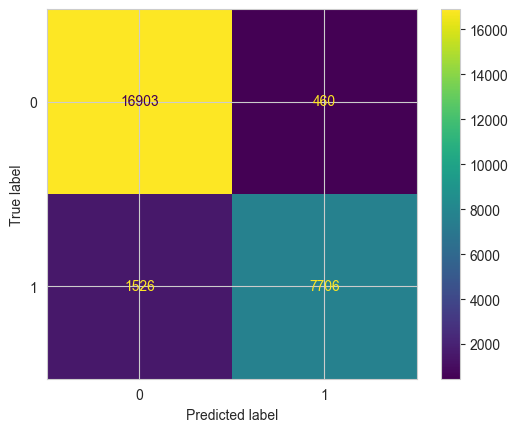

In [28]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     17363
           1       0.94      0.83      0.89      9232

    accuracy                           0.93     26595
   macro avg       0.93      0.90      0.92     26595
weighted avg       0.93      0.93      0.92     26595



#### KNN with 2 Classes.

Precision = TP/(TP+FP) = 94% for phishing URLS
i.e. When it predicts a phishing URL, it is correct 94% of the time.

Recall = TP/(TP+FN) = 83% for phishing URLs
i.e. It identifies 83% of the phishing URLs in the dataset.

F score = 2 * (Precision * Recall)/(Precision + Recall) = 89%

Accuracy = 93%
A KNN Model gives us about the same accuracy a logistic regression @ 93%.

However, recall is much lower at 83%.  So the number of phishing sites are being caught with KNN is much lower.  But when a phishing site is flagged, it is flagged more accurately (i.e. less regular sites are flagged as phishing).

That being said, F1 for 'non-Phishing sites' is higher at 94%.  So non-phishing sites are being more accurately identified and at a higher rate.

### Model Implementation - 18 Features

Let's run various ML models with a reduced feature set :

1. Logistic Regression
2. Decision Tree
3. KNN

In [41]:
### Let's create the Training Set before we do any standardization or normalization.
### Let's do a 70/30 split on test v. train
X_train_18,X_test_18,y_train_18,y_test_18 = train_test_split(data_x,y,
                                                             test_size = 0.3,
                                                             shuffle=True,
                                                             random_state=24)

### Standardize the training set for RFE
scaler = StandardScaler()
X_train_18 = scaler.fit_transform(X_train_18)
X_test_18 = scaler.transform(X_test_18)

In [42]:
logreg = LogisticRegression()
selector_18 = RFE(estimator=logreg, n_features_to_select=18)

X_train_18 = selector_18.fit_transform(X_train_18, y_train_18)
X_test_18 = selector_18.transform(X_test_18)
print(X_train_18)
Selected_Features_Support_18 = list(selector_18.support_)
Selected_Features_rank_18 = list(selector_18.ranking_)

[[ 3.22731069  1.15332021  0.18559692 ...  4.93541792  1.85387551
  -0.52337557]
 [-0.07427667 -0.21845291  3.02536017 ... -0.2847219  -0.25652145
   1.51669335]
 [-0.07427667  1.78644626 -1.23428471 ... -0.2847219  -0.25652145
  -0.39422817]
 ...
 [-0.07427667 -0.1551403   0.18559692 ... -0.2847219  -0.25652145
  -1.11456178]
 [-0.07427667 -0.57722434 -1.23428471 ... -0.2847219  -0.25652145
  -0.28841274]
 [-0.07427667 -0.28176551 -1.23428471 ... -0.2847219  -0.25652145
   1.28501671]]


In [43]:
Features = data_x.columns.tolist()
Selected_Features_18 = np.column_stack((Features, Selected_Features_Support_18, Selected_Features_rank_18))
print(Selected_Features_18)

[['qty_dot_url' 'False' '7']
 ['qty_hyphen_url' 'False' '52']
 ['qty_underline_url' 'False' '64']
 ['qty_slash_url' 'False' '27']
 ['qty_questionmark_url' 'False' '40']
 ['qty_equal_url' 'False' '63']
 ['qty_at_url' 'True' '1']
 ['qty_and_url' 'False' '30']
 ['qty_exclamation_url' 'False' '59']
 ['qty_space_url' 'False' '17']
 ['qty_tilde_url' 'False' '71']
 ['qty_comma_url' 'False' '32']
 ['qty_plus_url' 'False' '50']
 ['qty_asterisk_url' 'False' '3']
 ['qty_hashtag_url' 'False' '47']
 ['qty_dollar_url' 'False' '22']
 ['qty_percent_url' 'False' '2']
 ['qty_tld_url' 'False' '36']
 ['length_url' 'True' '1']
 ['qty_dot_domain' 'True' '1']
 ['qty_hyphen_domain' 'False' '15']
 ['qty_underline_domain' 'False' '76']
 ['qty_slash_domain' 'False' '88']
 ['qty_questionmark_domain' 'False' '86']
 ['qty_equal_domain' 'False' '84']
 ['qty_at_domain' 'False' '68']
 ['qty_and_domain' 'False' '89']
 ['qty_exclamation_domain' 'False' '90']
 ['qty_space_domain' 'False' '82']
 ['qty_tilde_domain' 'False

In [44]:
selected_idx = Selected_Features_18[:, 1] == 'True'
final_selection_18 = Selected_Features_18[selected_idx,0]
print(final_selection_18)

['qty_at_url' 'length_url' 'qty_dot_domain' 'qty_dot_directory'
 'qty_hyphen_directory' 'qty_slash_directory' 'qty_equal_directory'
 'qty_exclamation_directory' 'qty_asterisk_directory'
 'qty_exclamation_file' 'qty_tilde_file' 'qty_comma_file'
 'qty_equal_params' 'qty_and_params' 'params_length' 'tld_present_params'
 'qty_params' 'time_domain_activation']


In [45]:
print("X_train Shape:", X_train_18.shape)
print("y_train  Shape:", y_train_18.shape)
print("X_test Shape:", X_test_18.shape)
print("y_test  Shape:", y_test_18.shape)
display(X_train_18)
display(X_test_18)

X_train Shape: (62052, 18)
y_train  Shape: (62052,)
X_test Shape: (26595, 18)
y_test  Shape: (26595,)


array([[ 3.22731069,  1.15332021,  0.18559692, ...,  4.93541792,
         1.85387551, -0.52337557],
       [-0.07427667, -0.21845291,  3.02536017, ..., -0.2847219 ,
        -0.25652145,  1.51669335],
       [-0.07427667,  1.78644626, -1.23428471, ..., -0.2847219 ,
        -0.25652145, -0.39422817],
       ...,
       [-0.07427667, -0.1551403 ,  0.18559692, ..., -0.2847219 ,
        -0.25652145, -1.11456178],
       [-0.07427667, -0.57722434, -1.23428471, ..., -0.2847219 ,
        -0.25652145, -0.28841274],
       [-0.07427667, -0.28176551, -1.23428471, ..., -0.2847219 ,
        -0.25652145,  1.28501671]])

array([[-0.07427667, -0.19734871,  1.60547855, ..., -0.2847219 ,
        -0.25652145,  0.62679215],
       [-0.07427667, -0.28176551,  0.18559692, ..., -0.2847219 ,
        -0.25652145,  1.32675137],
       [-0.07427667, -0.30286971,  0.18559692, ..., -0.2847219 ,
        -0.25652145,  1.55645629],
       ...,
       [-0.07427667, -0.34507812,  0.18559692, ..., -0.2847219 ,
        -0.25652145,  0.70631803],
       [-0.07427667, -0.28176551,  0.18559692, ..., -0.2847219 ,
        -0.25652145,  0.91400546],
       [-0.07427667, -0.36618232, -1.23428471, ..., -0.2847219 ,
        -0.25652145,  1.47035802]])

### Logistic Regression

In [46]:
logreg = LogisticRegression()
logreg.fit(X_train_18, y_train_18)

## Calculating the accuracy
print('Accuracy of logistic regression classifier on test set: {:2f}'.format(logreg.score(X_test_18,y_test_18)))

Accuracy of logistic regression classifier on test set: 0.919722


In [47]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)

modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV,
                                          X_train_18,
                                          y_train_18,
                                          cv = kfold,
                                          scoring = scoring)
print("10-fold cross-validation average accuracy : %.3f" % (results.mean()))

10-fold cross-validation average accuracy : 0.920


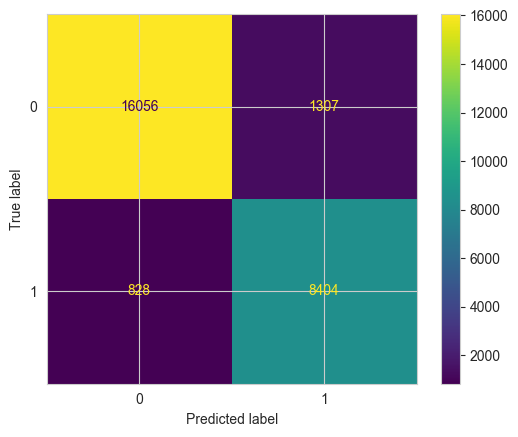

In [48]:
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test_18)
cm = confusion_matrix(y_test_18, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test_18,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86      8352
           1       0.85      0.91      0.88      9242

    accuracy                           0.87     17594
   macro avg       0.87      0.87      0.87     17594
weighted avg       0.87      0.87      0.87     17594



With 18 features for Logistic regression determined by RFE (Recursive Feature Elimination) here are the results:

Thus,
+ True Negative = 16056 - Not a Phishing Site (**predicted correctly**)
+ False Negative = 828 - Phishing site (predicted ***incorrectly***)
+ True Positive = 8404 - Phishing Site (**predicted correctly**)
+ False Positive = 1307 - Not a Phishing Site (predicted ***incorrectly***)

Precision = TP/(TP+FP) = 85% for  phishing URLS
i.e. When it predicts a phishing URL, it is correct 85% of the time.

Recall = TP/(TP+FN) = 91% for phishing URLs
i.e. It identifies 91% of the phishing URLs in the dataset.

F score = 2 * (Precision * Recall)/(Precision + Recall) = 88%

Accuracy = 87%
While Accuracy is high, we want more phishing sites to be caught.  So we want higher recall.

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(criterion="entropy",
                            min_samples_split=10,
                            max_depth=5)
dt.fit(X_train_18,y_train_18)
print ('Accuracy:', dt.score(X_test_18, y_test_18))

Accuracy: 0.9109231058469637


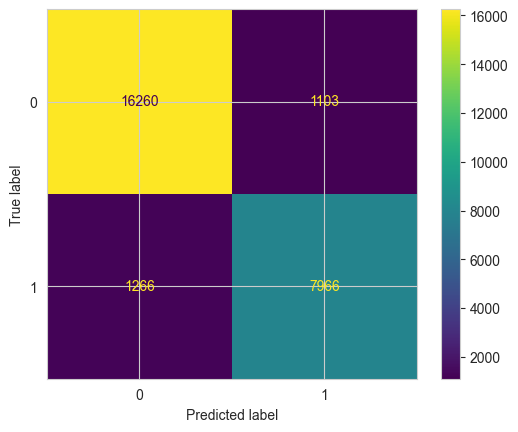

In [50]:
from sklearn.metrics import confusion_matrix

y_pred = dt.predict(X_test_18)
cm = confusion_matrix(y_test_18, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test_18,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     17363
           1       0.88      0.86      0.87      9232

    accuracy                           0.91     26595
   macro avg       0.90      0.90      0.90     26595
weighted avg       0.91      0.91      0.91     26595



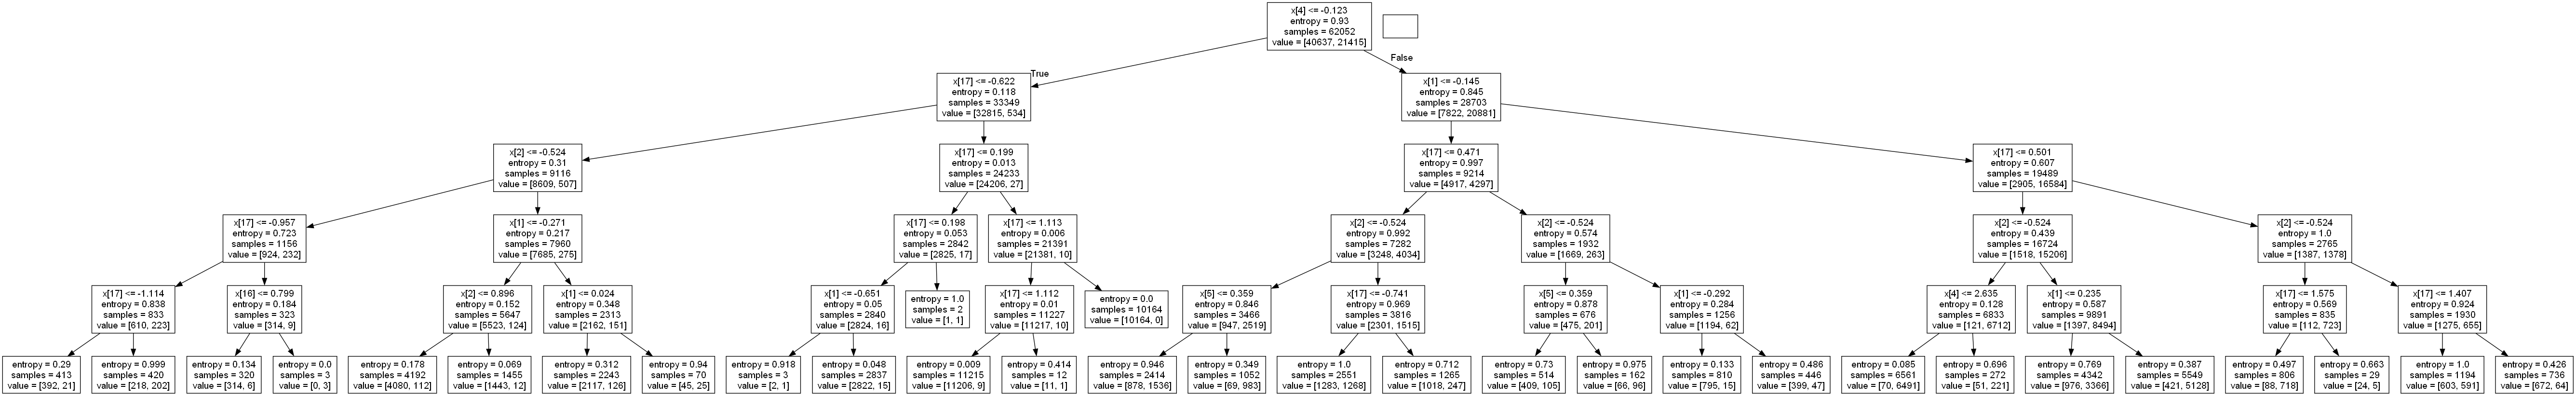

In [52]:
import graphviz
import pydotplus
from IPython.display import Image
import os
# For Windows machines, temporarily adjust PATH if necessary to use graphviz
os.environ['PATH'] = os.environ['PATH']+r";C:\Program Files\Graphviz\bin"

dot_data = tree.export_graphviz(dt, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))  

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(criterion="entropy",
                            min_samples_split=10,
                            max_depth=10)
dt.fit(X_train_18,y_train_18)
print ('Accuracy:', dt.score(X_test_18, y_test_18))

Accuracy: 0.9313404775333709


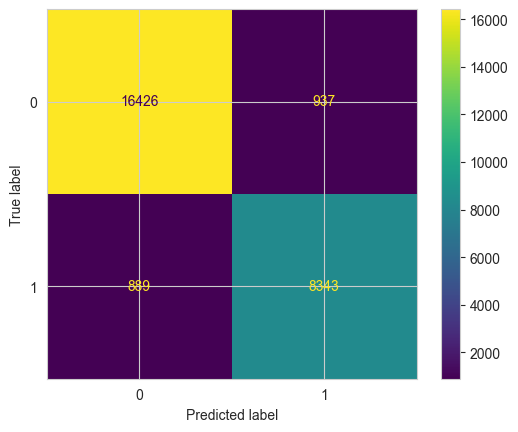

In [54]:
from sklearn.metrics import confusion_matrix

y_pred = dt.predict(X_test_18)
cm = confusion_matrix(y_test_18, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test_18,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17363
           1       0.90      0.90      0.90      9232

    accuracy                           0.93     26595
   macro avg       0.92      0.92      0.92     26595
weighted avg       0.93      0.93      0.93     26595



In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_18, y_train_18)
print ('Accuracy:', knn.score(X_test_18, y_test_18))

Accuracy: 0.923105846963715


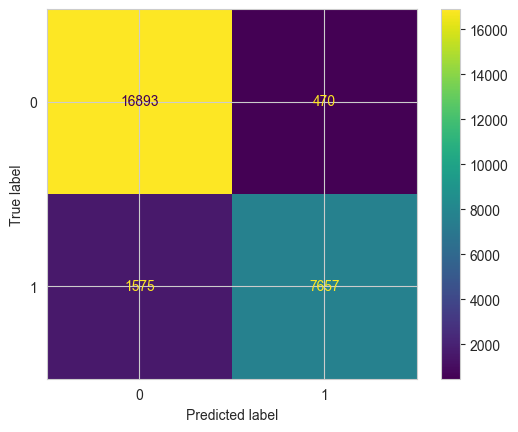

In [57]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test_18)
cm = confusion_matrix(y_test_18, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test_18,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      8352
           1       0.93      0.83      0.88      9242

    accuracy                           0.88     17594
   macro avg       0.88      0.88      0.88     17594
weighted avg       0.88      0.88      0.88     17594

